# Averaged data

In [5]:
from pandas import HDFStore, DataFrame, Series
from tqdm.auto import tqdm
from pandas import concat


def load_averaged_data(path: str) -> tuple[DataFrame, Series, Series]:
    loaded_data: dict[str, DataFrame] = {}

    # Open the HDF5 file
    with HDFStore(path) as store:
        # Iterate through the keys (group names) in the HDF5 file
        for key in tqdm(store.keys(), desc='Loading data'):
            # Load each DataFrame and store it in the dictionary
            loaded_data[key] = store[key]

    concated_df_avgs = concat(
        [loaded_data[key][("Average", "Balanced Accuracy")] for key in loaded_data.keys()],
        axis=1,
        keys=[el[1:] for el in loaded_data.keys()],
    )
    concated_df_errs = concat(
        [loaded_data[key][("Standard error", "Balanced Accuracy")] for key in loaded_data.keys()],
        axis=1,
        keys=[el[1:] for el in loaded_data.keys()],
    )
    df_avgs = concated_df_avgs.unstack().reset_index()
    df_avgs.columns = ["side", "classifier", "accuracy"]

    df_errs = concated_df_errs.unstack().reset_index()
    df_errs.columns = ["side", "classifier", "accuracy"]
    upper_errs = df_errs["accuracy"]
    lower_errs = df_errs["accuracy"]
    return df_avgs, upper_errs, lower_errs, df_errs
    
def make_linerrorplot(data: DataFrame, lower_errs: Series, upper_errs: Series, path_to_save: str) -> None:
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    
    plt.figure(figsize=(3, 7))
    sns.set_style("darkgrid")
    
    palette = sns.color_palette("colorblind")
    # sns.scatterplot(data=df, x='side', y='accuracy', hue='classifier')
    plt.errorbar(
        x=data["side"],
        y=data["accuracy"],
        xerr=None,
        yerr=(lower_errs, upper_errs),
        # label=custom_label,
        elinewidth=5,
        linestyle="none",
        markersize=1,
        marker=".",
        color=palette[0],
        ecolor=(*palette[0], 0.3),
    )
    plt.ylim(0.5, 1.0)
    
    plt.savefig(path_to_save, bbox_inches="tight")
    plt.show()
    # legend off
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    # 

## USILaughs

In [7]:
path_to_save_data_avgs = "../data.nosync/usilaughs/results/n_fold_fix_avg.h5"
# Create an empty dictionary to store the loaded DataFrames
df_avgs, upper_errs, lower_errs, df_errs = load_averaged_data(path_to_save_data_avgs)

Loading data:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
df_avgs['classifier'].nunique()

27

In [10]:
df_avgs['classifier'].unique()

array(['ExtraTreesClassifier', 'LGBMClassifier', 'RandomForestClassifier',
       'XGBClassifier', 'BaggingClassifier', 'SVC', 'NuSVC',
       'DecisionTreeClassifier', 'AdaBoostClassifier',
       'KNeighborsClassifier', 'LabelPropagation', 'LabelSpreading',
       'BernoulliNB', 'CalibratedClassifierCV', 'NearestCentroid',
       'LogisticRegression', 'SGDClassifier', 'LinearSVC',
       'RidgeClassifier', 'LinearDiscriminantAnalysis',
       'ExtraTreeClassifier', 'RidgeClassifierCV', 'GaussianNB',
       'PassiveAggressiveClassifier', 'QuadraticDiscriminantAnalysis',
       'Perceptron', 'DummyClassifier'], dtype=object)

In [11]:
display(
    concat([df_errs["accuracy"], df_avgs], axis=1, keys=["errors", "averages"])
    .groupby(("averages", "side"))
    .max()*100
)


errors                                           averages  \
                  accuracy                                         classifier   
(averages, side)                                                                
left              2.395833  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
lxrx                   NaN  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
right             3.359375  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
rxlx                   NaN  XGBClassifierXGBClassifierXGBClassifierXGBClas...   

                             
                   accuracy  
(averages, side)             
left              79.140625  
lxrx              77.682292  
right             83.151042  
rxlx              71.927083

In [3]:
display(
    concat([df_errs["accuracy"], df_avgs], axis=1, keys=["errors", "averages"])
    .groupby(("averages", "side"))
    .max()*100
)


errors                                           averages  \
                  accuracy                                         classifier   
(averages, side)                                                                
left              0.096634  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
lxrx              0.847246  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
right             0.108450  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
rxlx              0.453284  XGBClassifierXGBClassifierXGBClassifierXGBClas...   

                             
                   accuracy  
(averages, side)             
left              80.272487  
lxrx              78.333333  
right             85.287515  
rxlx              71.888021

## MWC2022

In [4]:
path_to_save_data_avgs = "../data.nosync/mwc2022/results/n_fold_avg.h5"
# Create an empty dictionary to store the loaded DataFrames
df_avgs, upper_errs, lower_errs, df_errs = load_averaged_data(path_to_save_data_avgs)

Loading data:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
display(
    concat([df_errs["accuracy"], df_avgs], axis=1, keys=["errors", "averages"])
    .groupby(("averages", "side"))
    .max()*100
)


errors                                           averages  \
                  accuracy                                         classifier   
(averages, side)                                                                
left              0.099683  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
lxrx              0.631455  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
right             0.084519  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
rxlx              0.785711  XGBClassifierXGBClassifierXGBClassifierXGBClas...   

                             
                   accuracy  
(averages, side)             
left              85.498009  
lxrx              73.583691  
right             82.092787  
rxlx              77.376609

# Total data

In [1]:
from pandas import DataFrame, concat, MultiIndex, Series
from collections import defaultdict
from pandas import concat
from numpy import nanstd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import itertools
from pandas import HDFStore, DataFrame
from tqdm.auto import tqdm


def calculate_fold_df(data: DataFrame):
    avgs = concat(
        [fold_res["Accuracy"] for fold_res in data.values()],
        axis=1,
        keys=range(5),
    ).mean(axis=1)
    errs = concat(
        [fold_res["Accuracy"] for fold_res in data.values()],
        axis=1,
        keys=range(5),
    ).apply(lambda x: nanstd(x) / ((len(x - 1)) ** 0.5) if len(x) > 1 else 1, axis=1)
    return concat([avgs, errs], axis=1, keys=["Accuracy", "Standard Error"])


def concatenate_prepared_data(data: dict[str, DataFrame]) -> DataFrame:
    concated_df_dict: dict[DataFrame, Series] = {}
    sides: list[str] = ["left", "right", "lxrx", "rxlx"]
    for side in sides:
        concated_df_dict[side] = concat(
            [
                data[key][["Accuracy", "Standard Error"]].sort_index()
                for key in data.keys()
                if side in key
            ],
            axis=0,
            keys=[key[1:5] for key in data.keys() if side in key],
        )
        concated_df_dict[side].index = concated_df_dict[side].index.droplevel(0)

    all_results = concat(
        list(concated_df_dict.values()),
        axis=0,
        keys=sides,
        # ignore_index=True,
    )
    all_results = all_results.reset_index()
    all_results.columns = ["Side", "Model", "Accuracy", "Standard Error"]
    return all_results


def load_prepare_data(path_to_all_data: str) -> DataFrame:
    loaded_data = defaultdict(lambda: defaultdict(lambda: dict()))

    # Open the HDF5 file
    with HDFStore(path_to_save_data_avgs) as store:
        # Iterate through the keys (group names) in the HDF5 file
        for key in tqdm(store.keys(), desc="Loading data"):
            # Load each DataFrame and store it in the dictionary
            data = store[key]
            split_key = key.split("_")
            loaded_data[split_key[0]][split_key[1]][split_key[2]] = data

    loaded_data_correct = {
        f"{key1}_{key2}": calculate_fold_df(loaded_data[key1][key2])
        for key1 in loaded_data.keys()
        for key2 in loaded_data[key1].keys()
    }

    return concatenate_prepared_data(data=loaded_data_correct)


def remove_dummy(data: DataFrame) -> DataFrame:
    return data[data["Model"] != "DummyClassifier"]


def make_violin_accuracy(
    data: DataFrame,
    sides: list[str],
    path_to_save_fig: str,
    small_fontsize: int = 14,
    medium_fontsize: int = 18,
    large_fontsize: int = 20,
    xlim: tuple[float, float] | None = None,
):
    # set seaborn style
    sns.set_style("darkgrid")

    # # set latex font
    plt.rcParams["mathtext.fontset"] = "stix"
    plt.rcParams["font.family"] = "STIXGeneral"
    # plt.rcParams.update({"font.size": figsize *8})
    plt.rcParams["axes.grid"] = True

    # increase font size
    plt.rc("font", size=small_fontsize)  # controls default text sizes
    plt.rc("axes", titlesize=medium_fontsize)  # fontsize of the axes title
    plt.rc("axes", labelsize=large_fontsize)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=small_fontsize)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=small_fontsize)  # fontsize of the tick labels
    plt.rc("legend", fontsize=medium_fontsize)  # legend fontsize
    plt.rc("figure", titlesize=large_fontsize)  # fontsize of the figure title
    plt.rcParams.update({"font.size": medium_fontsize})

    ax = sns.violinplot(
        data=data,
        y="Train-Test",
        x="Accuracy",
        palette="colorblind",
        orient="h",
    )
    annotator = Annotator(
        ax,
        list(itertools.combinations(sides, 2)),
        data=data,
        x="Accuracy",
        y="Train-Test",
        orient="h",
        order=sides,
    )
    annotator.configure(
        test="Mann-Whitney",
        comparisons_correction="BH",
        text_format="star",
        loc="outside",
    )
    annotator.apply_and_annotate()

    # set vertical line at 0.5
    plt.axvline(x=0.5, color="black", linestyle="--", linewidth=1)
    if xlim:
        plt.xlim(xlim)
    plt.savefig(path_to_save_fig, bbox_inches="tight")
    plt.show()


def clean_side_names(
    data: DataFrame, renaming_dict: dict[str, str] | None = None
) -> DataFrame:
    if renaming_dict is None:
        renaming_dict = {
            "left": "Left-Left",
            "right": "Right-Right",
            "lxrx": "Left-Right",
            "rxlx": "Right-Left",
        }
    renaming_dict: dict[str, str]
    data.loc[:, "Side"] = data.loc[:, "Side"].map(renaming_dict)
    return data.rename(columns={"Side": "Train-Test"}, inplace=False)


## USILaughs

In [2]:
path_to_save_data_avgs = "../data.nosync/usilaughs/results/n_fold_fix_all.h5"

order = [
    "Left-Left",
    "Right-Right",
    "Left-Right",
    "Right-Left",
]
# Create an empty dictionary to store the loaded DataFrames
all_results = load_prepare_data(path_to_save_data_avgs)
all_results_no_dummy = remove_dummy(data=all_results)
all_results_no_dummy = clean_side_names(data=all_results_no_dummy)


Loading data:   0%|          | 0/6 [00:00<?, ?it/s]

/var/folders/rc/t3h_b88s3vbg5dcd4pnlgskr0000gp/T/ipykernel_68044/1615981044.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Side"] = data.loc[:, "Side"].map(renaming_dict)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Left-Left vs. Right-Right: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.866e-05 U_stat=1.180e+02
Right-Right vs. Left-Right: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.018e-03 U_stat=5.180e+02
Left-Right vs. Right-Left: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.379e-02 U_stat=4.620e+02
Left-Left vs. Left-Right: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.801e-01 U_stat=2.785e+02
Right-Right vs. Right-Left: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.121e-08 U_stat=6.445e+02
Left-Left vs. Right-Left: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.189e-01 U_stat=3.510e+02


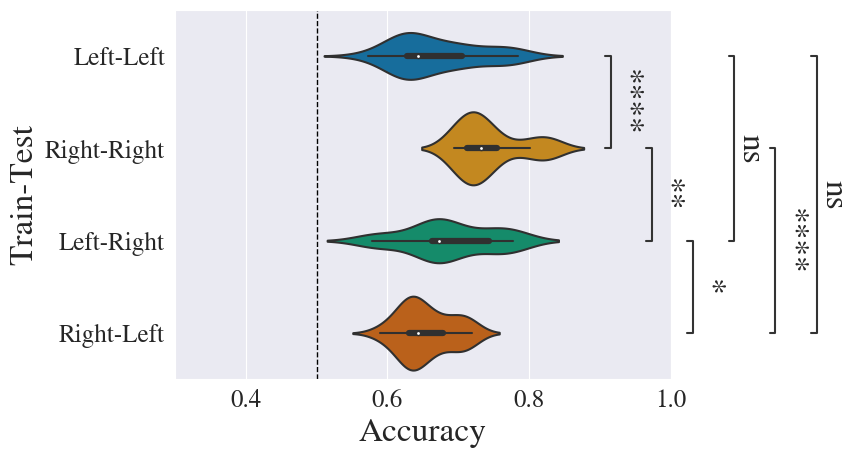

In [3]:
make_violin_accuracy(
    data=all_results_no_dummy,
    sides=order,
    path_to_save_fig="../final_visualizations/violin_n_fold_fix_accuracy_usilaughs.pdf",
    xlim=(0.3,1),
    small_fontsize=18, 
    medium_fontsize=24,
    large_fontsize=25,
)


In [20]:
average_acc = all_results_no_dummy.groupby('Train-Test')['Accuracy'].mean()
# NOTE: this error estimation is not actually correct.
err_acc = all_results_no_dummy.groupby('Train-Test')['Accuracy'].std() / (all_results_no_dummy.groupby('Train-Test')['Accuracy'].count().apply(lambda x: x**0.5))
for i in range(len(average_acc)):
    # print accuracy with format '0.2f' (2 decimal places)
    print('Average accuracy for {} side: {:.2f} ± {:.2f}'.format(average_acc.index[i], average_acc[i]*100, err_acc[i]*100))

Average accuracy for Left-Left side: 67.01 ± 1.17
Average accuracy for Left-Right side: 68.71 ± 1.20
Average accuracy for Right-Left side: 65.42 ± 0.71
Average accuracy for Right-Right side: 74.35 ± 0.87


In [4]:
average_acc = all_results_no_dummy.groupby('Train-Test')['Accuracy'].mean()
# NOTE: this error estimation is not actually correct.
err_acc = all_results_no_dummy.groupby('Train-Test')['Accuracy'].std() / (all_results_no_dummy.groupby('Train-Test')['Accuracy'].count().apply(lambda x: x**0.5))
for i in range(len(average_acc)):
    # print accuracy with format '0.2f' (2 decimal places)
    print('Average accuracy for {} side: {:.2f} ± {:.2f}'.format(average_acc.index[i], average_acc[i]*100, err_acc[i]*100))

Average accuracy for Left-Left side: 67.23 ± 0.05
Average accuracy for Left-Right side: 68.29 ± 0.13
Average accuracy for Right-Left side: 65.38 ± 0.08
Average accuracy for Right-Right side: 74.41 ± 0.04


In [21]:
max_acc = all_results_no_dummy.groupby('Train-Test').max()
display(max_acc)

,Model,Accuracy,Standard Error
Train-Test,,,
Left-Left,XGBClassifier,0.784722,0.020460
Left-Right,XGBClassifier,0.777778,1.000000
Right-Left,XGBClassifier,0.719907,1.000000
Right-Right,XGBClassifier,0.831019,0.022915


In [5]:
max_acc = all_results_no_dummy.groupby('Train-Test').max()
display(max_acc)

,Model,Accuracy,Standard Error
Train-Test,,,
Left-Left,XGBClassifier,0.830761,0.057205
Left-Right,XGBClassifier,0.811198,1.000000
Right-Left,XGBClassifier,0.729167,1.000000
Right-Right,XGBClassifier,0.877549,0.067099


## MWC2022

In [4]:
path_to_save_data_avgs = "../data.nosync/mwc2022/results/n_fold_all.h5"

order = [
    "Left-Left",
    "Right-Right",
    "Left-Right",
    "Right-Left",
]
# Create an empty dictionary to store the loaded DataFrames
all_results = load_prepare_data(path_to_save_data_avgs)
all_results_no_dummy = remove_dummy(data=all_results)
all_results_no_dummy = clean_side_names(data=all_results_no_dummy)


Loading data:   0%|          | 0/10200 [00:00<?, ?it/s]

/var/folders/rc/t3h_b88s3vbg5dcd4pnlgskr0000gp/T/ipykernel_57015/1615981044.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Side"] = data.loc[:, "Side"].map(renaming_dict)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Left-Left vs. Right-Right: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=4.500e+08
Right-Right vs. Left-Right: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.086e-148 U_stat=4.421e+07
Left-Right vs. Right-Left: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.727e-216 U_stat=1.681e+06
Left-Left vs. Left-Right: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=5.404e+07
Right-Right vs. Right-Left: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.132e-36 U_stat=2.876e+07
Left-Left vs. Right-Left: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.487e-114 U_stat=4.290e+07


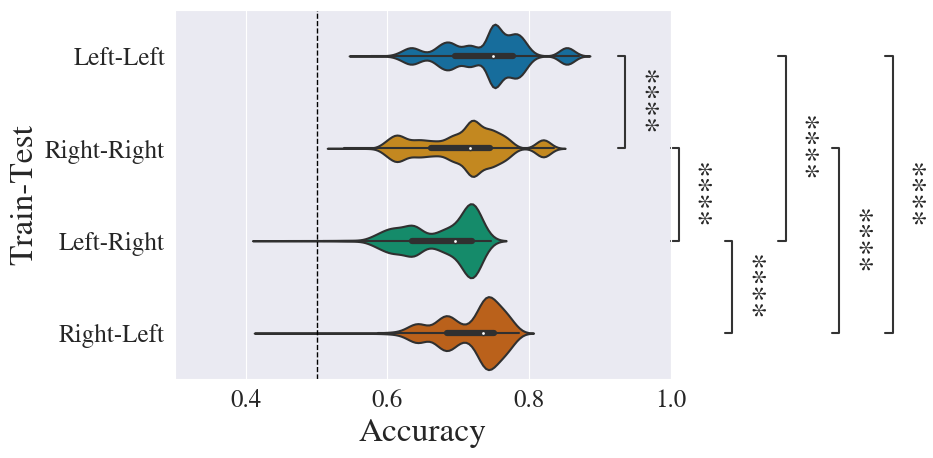

In [5]:
make_violin_accuracy(
    data=all_results_no_dummy,
    sides=order,
    path_to_save_fig="../final_visualizations/violin_n_fold_accuracy_mwc2022.pdf",
    xlim=(0.3,1),
    small_fontsize=18, 
    medium_fontsize=24,
    large_fontsize=25,
)


In [8]:
average_acc = all_results_no_dummy.groupby('Train-Test')['Accuracy'].mean()
# NOTE: this error estimation is not actually correct.
err_acc = all_results_no_dummy.groupby('Train-Test')['Accuracy'].std() / (all_results_no_dummy.groupby('Train-Test')['Accuracy'].count().apply(lambda x: x**0.5))
for i in range(len(average_acc)):
    # print accuracy with format '0.2f' (2 decimal places)
    print('Average accuracy for {} side: {:.2f} ± {:.2f}'.format(average_acc.index[i], average_acc[i]*100, err_acc[i]*100))

Average accuracy for Left-Left side: 74.00 ± 0.04
Average accuracy for Left-Right side: 67.60 ± 0.10
Average accuracy for Right-Left side: 71.65 ± 0.09
Average accuracy for Right-Right side: 70.66 ± 0.04


In [9]:
max_acc = all_results_no_dummy.groupby('Train-Test').max()
display(max_acc)

,Model,Accuracy,Standard Error
Train-Test,,,
Left-Left,XGBClassifier,0.870701,0.067039
Left-Right,XGBClassifier,0.746245,1.000000
Right-Left,XGBClassifier,0.786481,1.000000
Right-Right,XGBClassifier,0.835317,0.060214
